# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
np.random.seed(42)
X = np.linspace(0, 50, 100)
noise = np.random.normal(0, 10, size=100)
Y = 2*X + 3 + noise

In [3]:
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
print("Coefficient (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

Coefficient (m): 2.02416807187519
Intercept (c): 1.1978521298343523


In [6]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [7]:
print("train MAE:", mean_absolute_error(y_train, y_train_pred))
print("train MSE:", mean_squared_error(y_train, y_train_pred))
print("train R^2:", r2_score(y_train, y_train_pred))

train MAE: 7.441181635723114
train MSE: 86.34693050533704
train R^2: 0.9098068913504245


In [8]:

print("test MAE:", mean_absolute_error(y_test, y_test_pred))
print("test MSE:", mean_squared_error(y_test, y_test_pred))
print("test R^2:", r2_score(y_test, y_test_pred))


test MAE: 6.01312347498312
test MSE: 62.20422422901781
test R^2: 0.9325280805909615


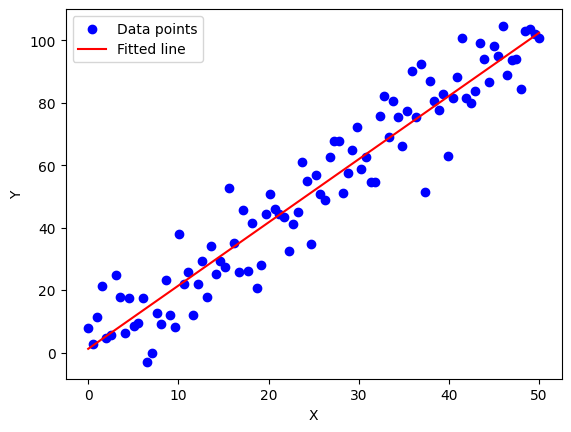

In [9]:
plt.scatter(X, Y, color="blue", label="Data points")
plt.plot(X, model.predict(X), color="red", label="Fitted line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


# The model performance is perfect, and that is not **suffering** from overfitting or underfitting.

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
np.random.seed(42)
x1 = np.random.uniform(0, 50, 100)
x2 = np.random.uniform(0, 30, 100)
noise = np.random.normal(0, 15, 100)
y = 4 * x1 + 2 * x2 + 10 + noise

In [12]:
X = np.column_stack((x1, x2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [3.92500663 2.39358687]
Intercept: 6.898862334602825


In [15]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [16]:
print("train MAE:", mean_absolute_error(y_train, y_train_pred))
print("train MSE:", mean_squared_error(y_train, y_train_pred))
print("train R^2:", r2_score(y_train, y_train_pred))

train MAE: 11.790541785329888
train MSE: 229.250434913789
train R^2: 0.9393915956051095


In [17]:
print("test MAE:", mean_absolute_error(y_test, y_test_pred))
print("test MSE:", mean_squared_error(y_test, y_test_pred))
print("test R^2:", r2_score(y_test, y_test_pred))

test MAE: 10.999722368850376
test MSE: 149.94722224466736
test R^2: 0.9650500611431765


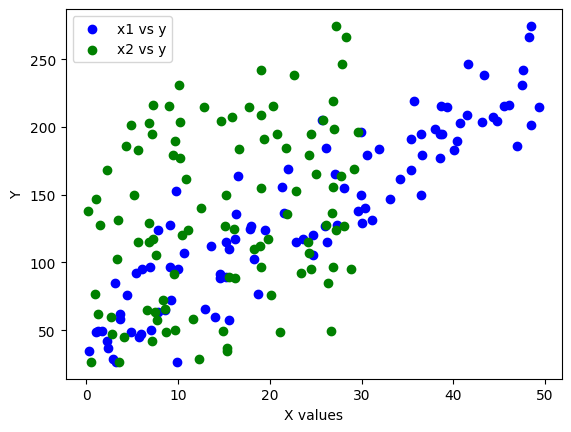

In [18]:
plt.scatter(x1, y, color="blue", label="x1 vs y")
plt.scatter(x2, y, color="green", label="x2 vs y")
plt.xlabel("X values")
plt.ylabel("Y")
plt.legend()
plt.show()

### **The learned coefficients are close to the original equation values, which indicates that the model successfully learned the relationship between the features and the target, no signs of overfitting or underfitting**

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
np.random.seed(42)
X = np.linspace(-10, 10, 100)
noise = np.random.normal(0, 20, 100)
y = 2 * X**2 + 3 * X + 5 + noise

In [21]:
X = X.reshape(-1, 1)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.         3.10700893 2.03663083]
Intercept: 1.359326969390537


In [24]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [25]:
print("train MAE:", mean_absolute_error(y_train, y_train_pred))
print("train MSE:", mean_squared_error(y_train, y_train_pred))
print("train R^2:", r2_score(y_train, y_train_pred))

train MAE: 14.920371871716373
train MSE: 344.1031326614022
train R^2: 0.9286990073102023


In [26]:
print("test MAE:", mean_absolute_error(y_test, y_test_pred))
print("test MSE:", mean_squared_error(y_test, y_test_pred))
print("test R^2:", r2_score(y_test, y_test_pred))

test MAE: 12.012829545042845
test MSE: 247.85321801579926
test R^2: 0.9217662772226523


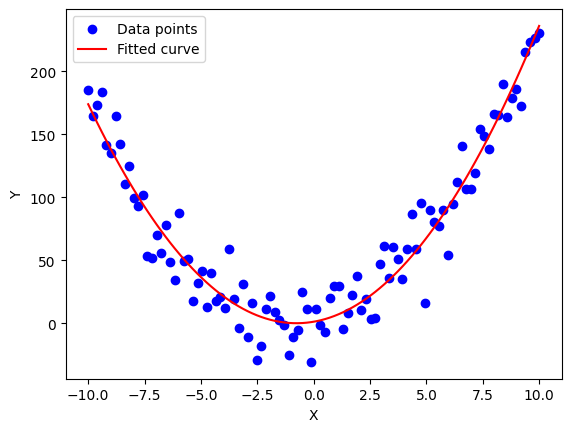

In [27]:
plt.scatter(X[:,0], y, color="blue", label="Data points")
plt.plot(X[:,0], model.predict(X_poly), color="red", label="Fitted curve")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# **Polynomial regression successfully modeled the non-linear relationship between X and Y, no signs of overfitting or underfitting**

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [28]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'airlines-flights-data' dataset.
Path to dataset files: /kaggle/input/airlines-flights-data


In [29]:
os.listdir(path)

['airlines_flights_data.csv']

In [30]:
full_path = os.path.join(path,os.listdir(path)[0])

In [31]:
import pandas as pd
df = pd.read_csv(full_path)

In [32]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
               index       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000

In [35]:
df = df.drop_duplicates()
df = pd.get_dummies(df, columns=['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class'], drop_first=True)

In [36]:
scaler = StandardScaler()
df[['duration','days_left']] = scaler.fit_transform(df[['duration','days_left']])

In [37]:
X = df.drop('price', axis=1)
y = df['price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [46]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-4.52568056e-02  4.06862603e+02 -1.63871772e+03 ...  1.03537460e+03
 -7.48963941e+02 -5.15849535e+04]
Intercept: 59743.01033665892


In [48]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [49]:
print("train MAE:", mean_absolute_error(y_train, y_train_pred))
print("train MSE:", mean_squared_error(y_train, y_train_pred))
print("train R^2:", r2_score(y_train, y_train_pred))

train MAE: 4231.544508922386
train MSE: 37713450.507343605
train R^2: 0.9267860753431386


In [50]:
print("test MAE:", mean_absolute_error(y_test, y_test_pred))
print("test MSE:", mean_squared_error(y_test, y_test_pred))
print("test R^2:", r2_score(y_test, y_test_pred))

test MAE: 4230.618233893876
test MSE: 38040296.472883366
test R^2: 0.926204452755443


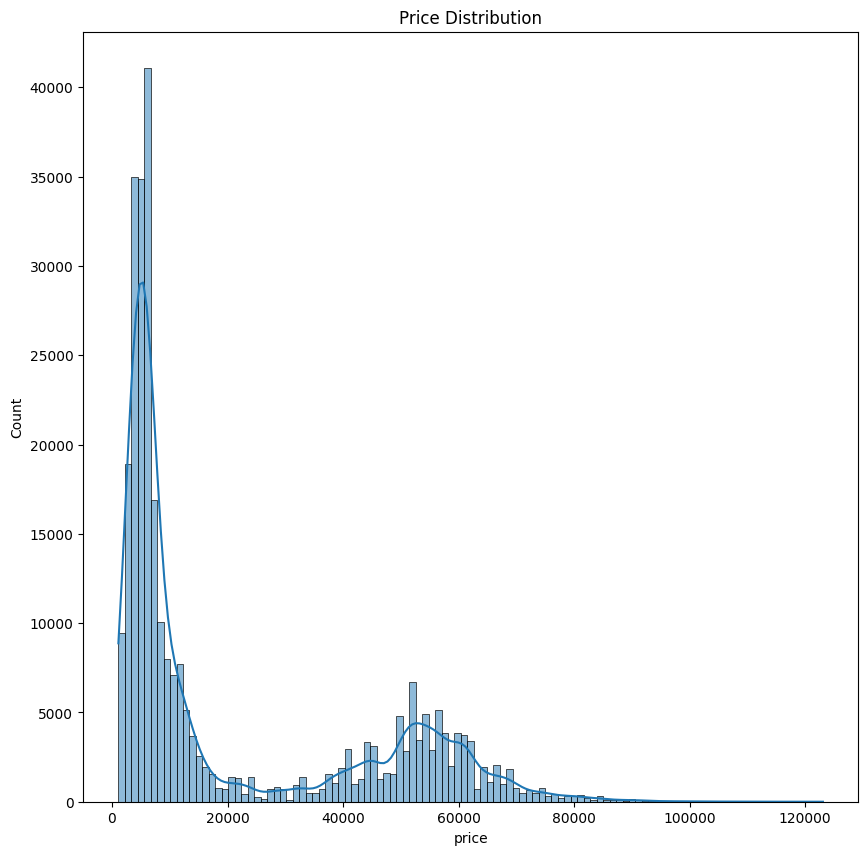

In [57]:
plt.figure(figsize=(10,10))
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()

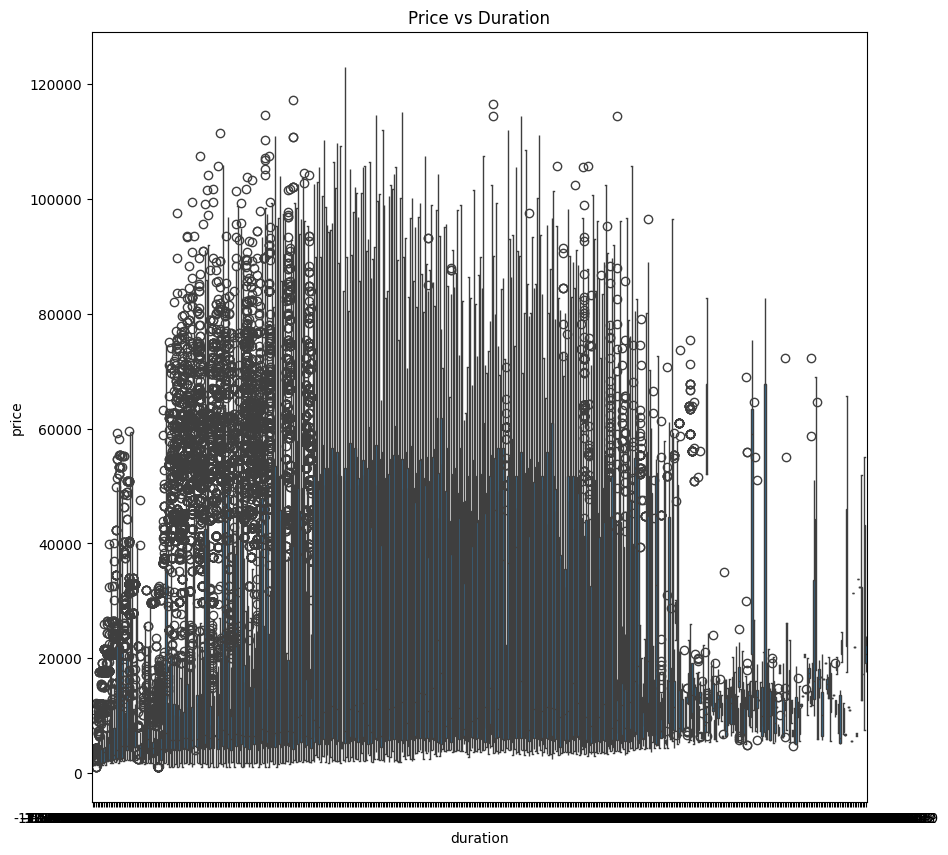

In [55]:
plt.figure(figsize=(10,10))
sns.boxplot(x='duration', y='price', data=df)
plt.title("Price vs Duration")
plt.show()

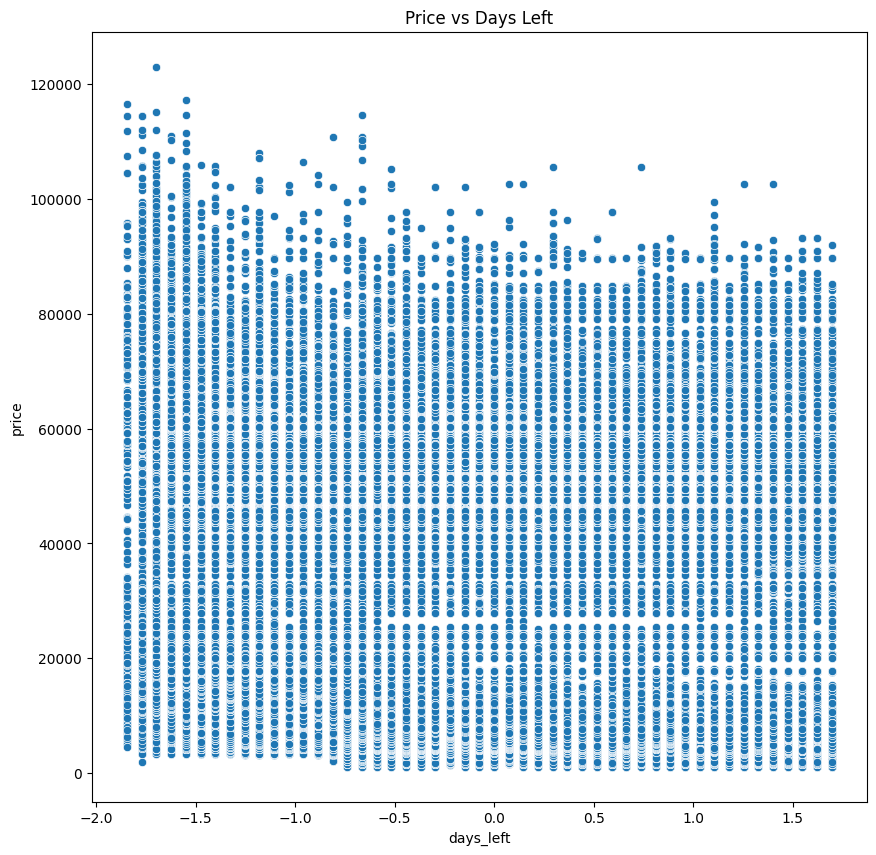

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='days_left', y='price', data=df)
plt.title("Price vs Days Left")
plt.show()

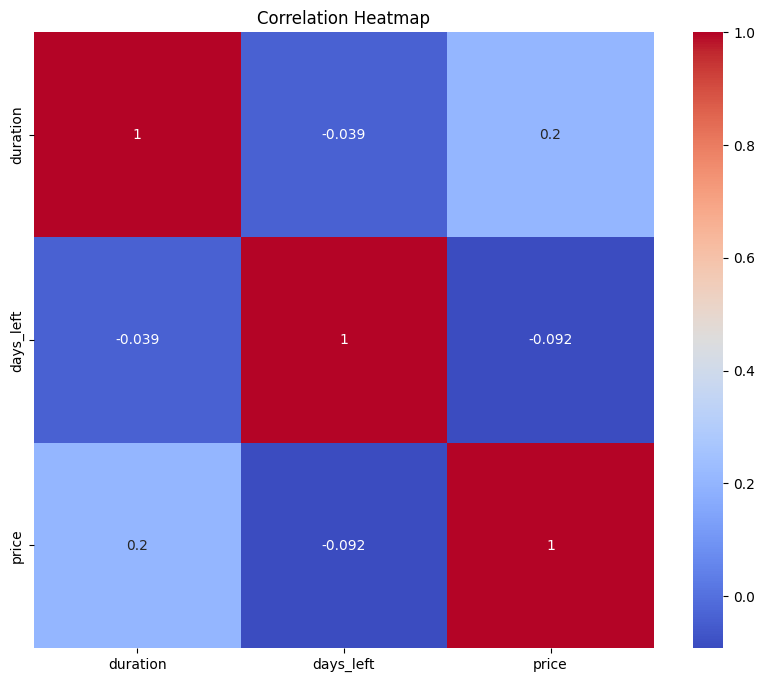

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['duration','days_left','price']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()